In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, Dense, LSTM, RNN, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [5]:
x_train, x_test=x_train/255.0, x_test/255.0

In [6]:
T, D=x_train[0].shape

In [7]:
i=Input(shape=(T,D))
x=LSTM(128)(i)
x=Dense(10, activation='softmax')(x)
model=Model(i,x)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [8]:
r=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3343 - accuracy: 0.8927 - val_loss: 0.1347 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1052 - accuracy: 0.9688 - val_loss: 0.0773 - val_accuracy: 0.9766
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0565 - val_accuracy: 0.9831
Epoch 4/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0570 - accuracy: 0.9826 - val_loss: 0.0554 - val_accuracy: 0.9836
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 6/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0518 - val_accuracy: 0.9841
Epoch 7/10
60000/60000 [==========================

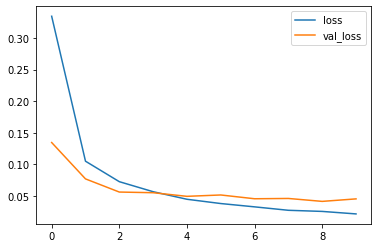

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

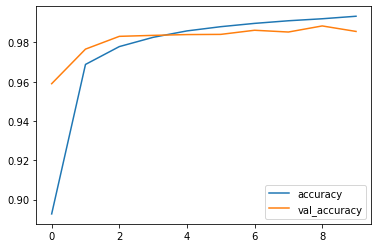

In [10]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0457 - accuracy: 0.9856


[0.04565589997416828, 0.9856]